# Análise exploratória dos dados

Esse documento tem como fim analisar os acidentes ocorridos nas rodovias que são administradas pela concessionária RioSP.

## Importanto bibliotecas

Bibliotecas usadas na análise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Lendo arquivo csv com pandas

In [2]:
# Usando o método read_csv do pandas para ler o arquivo csv. 
# Adicionei parâmetros para a leitura correta do arquivo

df = pd.read_csv(
    'demostrativo_acidentes_riosp.csv', 
    delimiter=';',              
    encoding='latin-1'          
)

# O arquivo csv está separado por ';', o padrão do read_csv é ',',
# Por isso é necessário informar o separador usado
# 'utf-8' é o padrão do encoding do read_csv, 
# mas esse arquivo possui caracteres especiais que não estão no 'utf-8', 
# por isso é recomendável usar o 'latin-1'

#### 🧩 Encodings mais comuns no Python e no Jupyter

##### O que é “encoding”
**Encoding (codificação)** é o processo de converter caracteres em bytes dentro de um arquivo.  
Quando o Python lê o arquivo, ele precisa saber **qual codificação foi usada** para interpretar o texto corretamente.

---

##### 🌍 Encodings mais comuns

| Encoding | Também chamado de | Descrição | Onde é mais usado |
|-----------|------------------|------------|--------------------|
| **UTF-8** | — | Padrão moderno da web e do Python. Suporta todos os caracteres Unicode. | Web, APIs, Linux, arquivos recentes. |
| **Latin-1** | ISO-8859-1 | Codificação de idiomas ocidentais, incluindo acentos e cedilha. | Europa Ocidental, Brasil (sistemas antigos). |
| **CP1252** | Windows-1252 | Variação do Latin-1 usada pelo Windows. Inclui símbolos extras (€). | Windows, Excel, Word. |
| **UTF-16** | — | Codificação Unicode em 2 bytes. Pode ter “BOM” (Byte Order Mark). | Arquivos exportados de Excel/Windows. |
| **UTF-8-SIG** | — | UTF-8 com BOM no início do arquivo. Evita erros em alguns programas Microsoft. | Windows, Excel. |
| **ASCII** | — | Codifica apenas caracteres básicos (A–Z, 0–9, pontuação simples). | Arquivos antigos, sistemas legados. |
| **CP850 / CP437** | — | Codificações antigas do DOS. | Sistemas legados (ERP, impressoras antigas). |
| **Shift-JIS / EUC-JP** | — | Codificações para caracteres japoneses. | Japão. |
| **GBK / GB2312** | — | Codificações para caracteres chineses. | China. |
| **KOI8-R** | — | Codificação para o alfabeto cirílico (russo). | Rússia. |

---

##### 💡 Dicas práticas

1. 🔹 **UTF-8** → sempre que possível, **use ou converta para UTF-8**.  
   É o padrão mais universal e evita erros de leitura no Python.

2. 🔹 **Latin-1 (ISO-8859-1)** → muito comum em **arquivos brasileiros** ou exportados do Excel.  
   Se tiver acentos e der erro de `utf-8`, tente este.

3. 🔹 **CP1252** → muito parecido com o Latin-1, mas com alguns símbolos a mais.  
   Também típico d


Fonte: ChatGPT


In [3]:
# Visualizando os dados
# Para melhor visualização, irei ordenar o arquivo por data e hora
# Para realizar a ordenação, preciso transformar as variáveis de hora e data em datetime

df['datahora'] = pd.to_datetime(
    df['data'] + ' ' + df['horario'],   # Unindo os dois dados
    format='%d/%m/%Y %H:%M:%S'          # Formatando no padrão de data e hora brasileiro
)

df = df.sort_values('datahora').reset_index(drop=True)        # Ordenando o dataframe pela nova coluna de data e hora, e reseto o index
df

,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,datahora
0,01/03/2022,01:30:00,295,Acidente s,"182,3",BR-116/SP,Norte,Colisão traseira,0,0,...,0,0,0,0,2,0,0,0,0,2022-03-01 01:30:00
1,01/03/2022,03:19:00,56,Acidente s,"6,5",BR-116/SP,Norte,Choque em objeto fixo,0,0,...,0,0,0,0,1,0,0,0,0,2022-03-01 03:19:00
2,01/03/2022,05:58:00,456,Acidente c,"178,6",BR-116/RJ,Norte,Colisão traseira,0,0,...,0,0,0,0,0,4,0,0,0,2022-03-01 05:58:00
3,01/03/2022,06:22:00,88,Acidente c,"181,2",BR-116/RJ,Norte,Queda de Carga,0,0,...,0,0,0,0,0,1,0,0,0,2022-03-01 06:22:00
4,01/03/2022,06:57:00,480,Acidente c,"205,49",BR-116/RJ,Sul,Choque Talude,1,0,...,0,0,0,0,0,3,0,0,0,2022-03-01 06:57:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29686,30/09/2025,09:33:00,629,Com vítima,"401,000",BR-101/RJ,Crescente,Engavetamento,3,0,...,0,0,0,0,2,1,0,0,0,2025-09-30 09:33:00
29687,30/09/2025,10:11:00,639,Com vítima,"50,000",BR-101/SP,Decrescente,Colisão lateral em sentido contrário,1,0,...,0,0,0,0,2,1,0,0,0,2025-09-30 10:11:00
29688,30/09/2025,10:49:00,279,Com vítima,"248,000",BR-116/RJ,Crescente,Capotamento,0,0,...,0,0,0,0,0,2,0,0,0,2025-09-30 10:49:00
29689,30/09/2025,11:31:00,661,Sem vítima,"382,500",BR-101/RJ,Decrescente,Atropelamento de pedestre,0,0,...,0,0,0,1,2,0,0,0,0,2025-09-30 11:31:00


In [4]:
# Usando o min e o max, podemos ver o início e fim do nosso histório
# E com o count é possível ver a quantidade de registros

print(
    'Inicio do histórico: \n',
    df['datahora'].min(), '\n\n',
    'Fim do histórico: \n',
    df['datahora'].max(), '\n\n',
    'Quantidade de registros: \n',
    df['datahora'].count()
)


Inicio do histórico: 
 2022-03-01 01:30:00 

 Fim do histórico: 
 2025-09-30 12:51:00 

 Quantidade de registros: 
 29691


In [5]:
# Podemos usar o describe que também obteriamos esses resultados. Ele retorna algumas dados estatísticos do df

df['datahora'].describe()

count                            29691
mean     2023-12-11 20:07:11.169041152
min                2022-03-01 01:30:00
25%                2023-01-17 10:32:30
50%                2023-12-14 06:23:00
75%                2024-10-21 09:45:30
max                2025-09-30 12:51:00
Name: datahora, dtype: object

Com esses poucos métodos, podemos obter a informação que nossos dados começão no dia 01 de março de 2022, e vão até 30 de setembro de 2025, e contam com 29.691 registros de acidentes

## Explorando nossos dados com gráficos

Agora para explorarmos nossos dados e obtermos informações mais objetivas, vou usar os gráficos do seaborn para ajudar na análise.

Vamos começar entendendo a quantidade de acidentes por trimestre

### Criando um gráfico de linha

In [6]:
# É criado uma nova coluna pegando por meio do atributo dt da colunda datahora o ano e o trimestre
# Transformo em string com o método .astype para poder concatenar essas infos em uma coluna única
df['trimestre'] = df['datahora'].dt.year.astype('str') + '.' + df['datahora'].dt.quarter.astype(str)

In [7]:
# Agrupo os registros pela coluna trimestre criada
# Passo o False para o parâmetro 'as_index' para que a coluna trimestre não vire um index

df_trimestre = df.groupby(
    'trimestre',
    as_index=False
).size()

# O método .size no final serve justamente para fazer a contagem das ocorrências, sem precisar contar alguma colunas específica

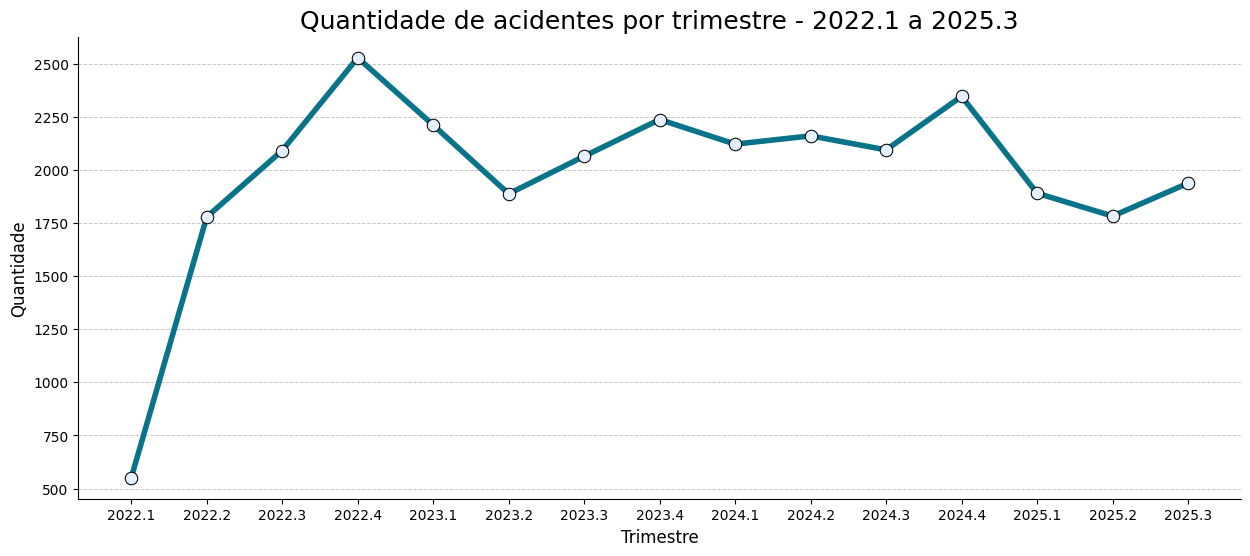

In [8]:
# Criando o gráfico de linha

# Criando o gráfico de linha com a função lineplot 
ax = sns.lineplot(
    data = df_trimestre,
    x = 'trimestre',
    y = 'size',
    color = '#09738a',       # Altera a cor da linha, pode ser usado com hex
    linewidth = 4,          # Altera a grossura da linha
    marker = 'o',           # Adiciona marcadores a linha
    markersize = 9          # Altera o tamanho dos marcadores
)

# Aqui vão algumas customizações

# Alterando o tamanho do gráfico
ax.figure.set_size_inches(15,6)

# Adicionando título
ax.set_title(
    'Quantidade de acidentes por trimestre - 2022.1 a 2025.3',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax.set_xlabel(
    'Trimestre',
    fontsize = 12
)
ax.set_ylabel(
    'Quantidade',
    fontsize = 12
)

# Adiciona linhas horizontais para ajudar na visualização dos dados
ax.grid(
    axis='y',           # Em qual eixo será criado as linhas
    linestyle='--',     # Estilo das linhas
    linewidth=0.7,      # Grossura das linhas
    alpha=0.7           # Transparência
)

# Altera as cores dos marcadores
for line in ax.lines:
    line.set_markerfacecolor('#e5effe')  # cor interna
    line.set_markeredgecolor('black')   # borda 

# Retira as linhas que fecham a 'caixa' do gráfico, mantendo apenas os eixos
sns.despine()

# Exibindo o gráfico
plt.show()

Por meio do Seaborn, e com os modificadores do Matplotlib, foi criado um gráfico para visualização da quantidade de acidentes ocorridos por trimestre desde março de 2022 até setembro de 2025.

Por meio do gráfico podemos observar que existe um vale justamente no começo do gráfico, no 1º trimestre de 2022. Isso ocorre porque o 1º trimestre de 2022 só possui dados de  março, que é onde começa nossos dados. Para que isso não afete nossa visão, já que esse trimestre possui menos tempo de apuração de dados que os restantes, é necessário exclui-lo do nosso df_trimestre.

In [9]:
# Filtrando o df_trimestre, retirando o trimestre 2022.1

df_trimestre = df_trimestre[df_trimestre['trimestre'] != '2022.1']

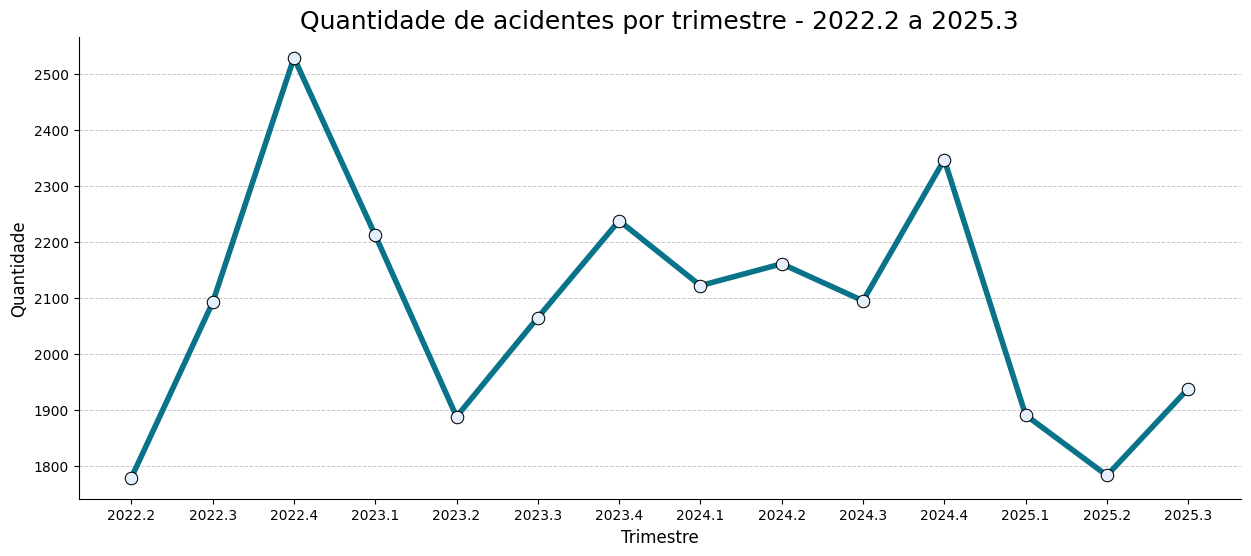

In [10]:
# Refazendo o gráfico

# Criando o gráfico de linha com a função lineplot 
ax = sns.lineplot(
    data = df_trimestre,
    x = 'trimestre',
    y = 'size',
    color = '#09738a',       # Altera a cor da linha, pode ser usado cores pelo hex
    linewidth = 4,          # Altera a grossura da linha
    marker = 'o',           # Adiciona marcadores a linha
    markersize = 9          # Altera o tamanho dos marcadores
)

# Aqui vão algumas customizações

# Alterando o tamanho do gráfico
ax.figure.set_size_inches(15,6)

# Adicionando título
ax.set_title(
    'Quantidade de acidentes por trimestre - 2022.2 a 2025.3',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax.set_xlabel(
    'Trimestre',
    fontsize = 12
)
ax.set_ylabel(
    'Quantidade',
    fontsize = 12
)

# Adiciona linhas horizontais para ajudar na visualização dos dados
ax.grid(
    axis='y',           # Em qual eixo será criado as linhas
    linestyle='--',     # Estilo das linhas
    linewidth=0.7,      # Grossura das linhas
    alpha=0.7           # Transparência
)

# Altera as cores dos marcadores
for line in ax.lines:
    line.set_markerfacecolor('#e5effe')  # todos os marcadores laranja
    line.set_markeredgecolor('black')   # borda preta

# Retira as linhas que fecham a 'caixa' do gráfico, mantendo apenas os eixos
sns.despine()

# Exibindo o gráfico
plt.show()

Com o outlier removido, é possível ter uma visão mais limpa da variação de acidentes durante o período.

#### 🎯 Formatos Comuns de Marcadores (Markers) no Matplotlib/Seaborn

Os marcadores (`marker`) são usados para destacar pontos em gráficos de linha (`lineplot`) ou scatter plots.  

##### Formatos mais comuns

| Símbolo | Forma |
|---------|------|
| `'o'`   | Círculo |
| `'s'`   | Quadrado |
| `'^'`   | Triângulo para cima |
| `'v'`   | Triângulo para baixo |
| `'D'`   | Losango |
| `'*'`   | Estrela |
| `'X'`   | X maiúsculo |
| `'P'`   | Pentágono |
| `'H'`   | Hexágono |

#### 🎨 Tipos de Linhas (Line Styles) no Matplotlib/Seaborn

O parâmetro `linestyle` ou `ls` define o estilo da linha em gráficos de linha (`lineplot`) ou gráficos de linha do Matplotlib.

##### Tipos comuns de linhas

| Código | Estilo |
|--------|--------|
| `'-'`  | Linha contínua (solid) |
| `'--'` | Linha tracejada (dashed) |
| `'-.'` | Linha traço-ponto (dash-dot) |
| `':'`  | Linha pontilhada (dotted) |
| `'None'` ou `''` | Sem linha (apenas marcadores) |


Fonte: ChatGPT

### Criando um gráfico de colunas

Agora vamos verificar a quantidade de acidentes nos trechos das rodovias.

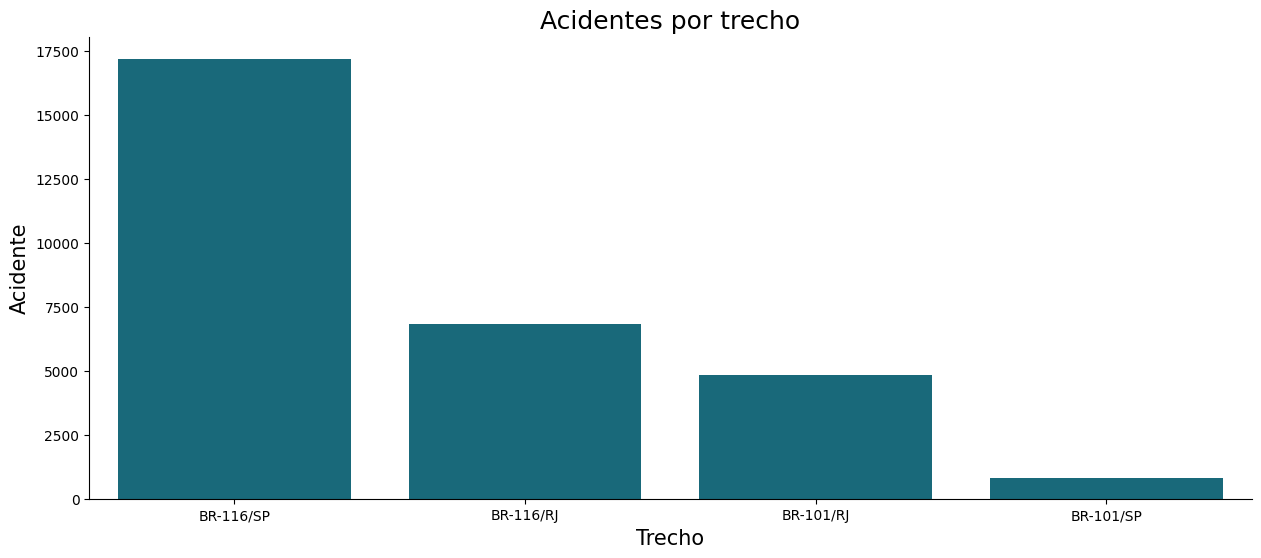

In [11]:
# Criando o gráfico de colunas

# Com a função 'countplot' podemos criar um gráfico com a 
# contagem de ocorrências da coluna informada no parâmetro x
ax_trecho = sns.countplot(
    data = df,
    x = 'trecho',
    color = '#09738a'
)

# Alterando o tamanho do gráfico
ax_trecho.figure.set_size_inches(15,6)

# Adicionando título
ax_trecho.set_title(
    'Acidentes por trecho',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax_trecho.set_xlabel(
    'Trecho',
    fontsize = 15
)
ax_trecho.set_ylabel(
    'Acidente',
    fontsize = 15
)

# Retira as linhas que fecham a 'caixa' do gráfico, mantendo apenas os eixos
sns.despine()

# Exibindo o gráfico
plt.show()

Com o gráfico de colunas contando a quantidade de acidentes por trecho podemos ter uma visão da distribuição de acidentes. Podemos verificar que a maior quantidade de acidentes ocorre no trecho 'BR-116/SP', com a visão gráfica é até possível perceber que o valor da 'BR-116/SP' é praticamente o dobro do 2º colocado 'BR-116/RJ'.

### Gráfico de colunas agrupadas

Com o número de acidentes por trecho podemos ver qual o trecho com mais acidente, mas e se quisermos ver esse mesmo gráfico, mas por ano?

Podemos criar um gráfico de colunas agrupadas adicionando um único parâmetro na criação do gráfico: o parametro **'hue'**.

In [12]:
# Criando uma coluna de ano no df

df['ano'] = df['datahora'].dt.year

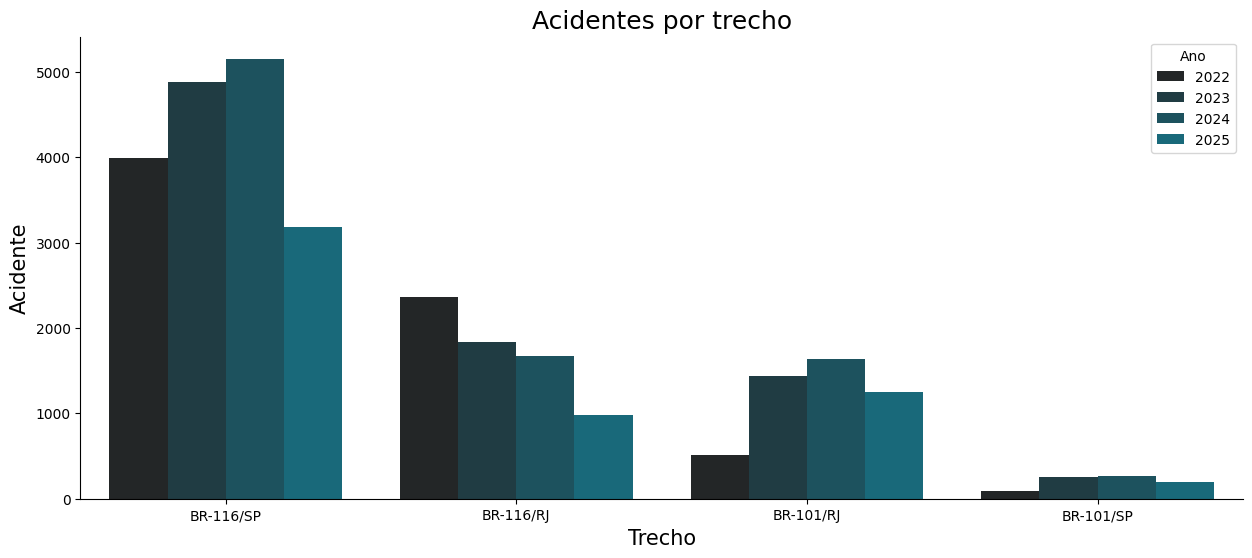

In [13]:
# Criando o gráfico de colunas

# Com a função 'countplot' podemos criar um gráfico com a 
# contagem de ocorrências da coluna informada no parâmetro x
ax_trecho = sns.countplot(
    data = df,
    x = 'trecho',
    # color = '#09738a',    # Com o hue ativo, não informe cor
    palette='dark:#09738a', # Informe uma paleta de cores
    hue = 'ano'
)

# Alterando o tamanho do gráfico
ax_trecho.figure.set_size_inches(15,6)

# Adicionando título
ax_trecho.set_title(
    'Acidentes por trecho',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax_trecho.set_xlabel(
    'Trecho',
    fontsize = 15
)
ax_trecho.set_ylabel(
    'Acidente',
    fontsize = 15
)

# Alterando o nome do título
ax_trecho.legend(title='Ano')

# Retira as linhas que fecham a 'caixa' do gráfico, mantendo apenas os eixos
sns.despine()

# Exibindo o gráfico
plt.show()

Como sabemos, nosso dataframe não possui os anos de 2022 e 2025 completos, mas mesmo assim podemos tirar alguma informação de desse nosso gráfico.

Uma curiosidade é que os acidentes no trecho 'BR-116/RJ' vem caindo ano após ano. Mesmo em 2022, que não está completo, houveram mais acidentes que nos outros anos completos.

O trecho com mais acidentes é o trecho 'BR-116/SP', e o ano com mais acidentes foi 2024.

### Criando um gráfico de barras horizontais

Dentro do nosso df, existe uma coluna que classifica os tipos de acidentes, vamos analisar qual tipo de acidente é mais frequente.

In [14]:
# Criando um df que irá agrupar os dados por tipo de acidente

df_tipoAcidente = df.groupby(
    'tipo_de_acidente',
    as_index=False
).size().sort_values('size', ascending=False)

# Uso o size para criar uma coluna de contagem
# Uso o sort_values com ascending igual a False
# para ordenar do maior para o menor

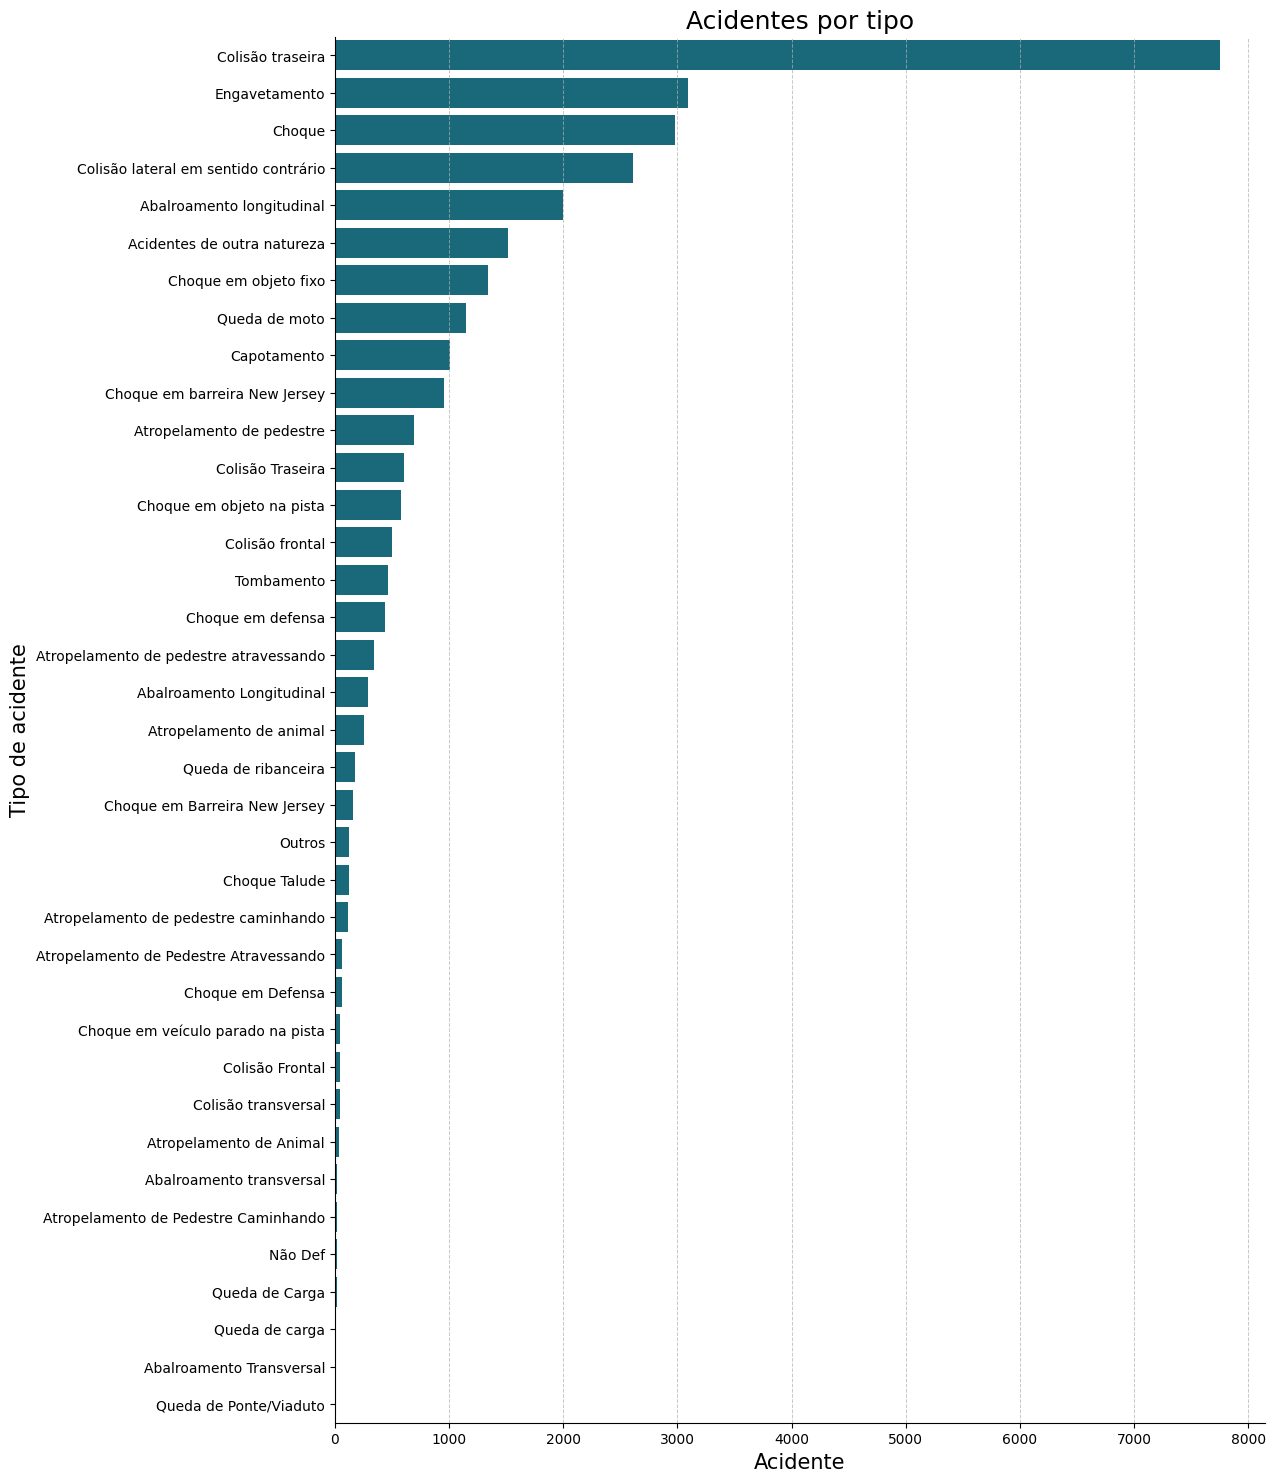

In [15]:
# Criando gráfico de barras horizontais

# Criando o gráfico com barplot
ax_tipoAcidente = sns.barplot(
    data = df_tipoAcidente,
    x = 'size',
    y = 'tipo_de_acidente',
    color = '#09738a'
    # order = 'size'
    
    # Se o df não estiver ordenado, 
    # podemos ordenar ao fazer o gráfico
    # usando o parâmetro 'order'
)

# Alterando o tamanho do gráfico
ax_tipoAcidente.figure.set_size_inches(12,18)

# Alterando o título
ax_tipoAcidente.set_title(
    'Acidentes por tipo',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax_tipoAcidente.set_xlabel(
    'Acidente',
    fontsize = 15
)
ax_tipoAcidente.set_ylabel(
    'Tipo de acidente',
    fontsize = 15
)

# Adiciona linhas horizontais para ajudar na visualização dos dados
ax_tipoAcidente.grid(
    axis='x',           # Em qual eixo será criado as linhas
    linestyle='--',     # Estilo das linhas
    linewidth=0.7,      # Grossura das linhas
    alpha=0.7           # Transparência
)

# Retira as linhas que fecham a 'caixa' do gráfico, mantendo apenas os eixos
sns.despine()

# Exibindo o gráfico
plt.show()

O gráfico de barras horizontais é perfeito para lidarmos com varias categorias e que possuem uma descrição um pouco extensa. Na nossa análise, conseguimos verificar que tipo de acidente mais comum é a **colisão traseira**, com mais que o dobro do 2º colocado, que é **engavetamento**.

### Gráficos de distribuição

### Histograma

Podemos usar um histograma para entender como nossos dados se distribuem em uma determinada variável.

Vamos fazer isso, olhando os acidentes por rodovia e altura do acidente (km).

O dataframe está dividido em trechos, não rodovias, vamos precisar tratar isso.

In [16]:
# Primeiro vamos transformar a variável km em float

# Usando o .replace eu troco a vírgula por ponto
# Em seguida com .astype eu transformo em float
df['km_ajustado'] = df['km'].str.replace(',','.').astype('float')

In [17]:
# Buscando as rodovias pelo nomes dos trechos

# Uso o .split para dividir a string do trecho em duas,
# E uso o parâmetro expand para separar a lista criada em duas colunas
df[['rodovia', 'estado']] = df['trecho'].str.split('/', expand=True)

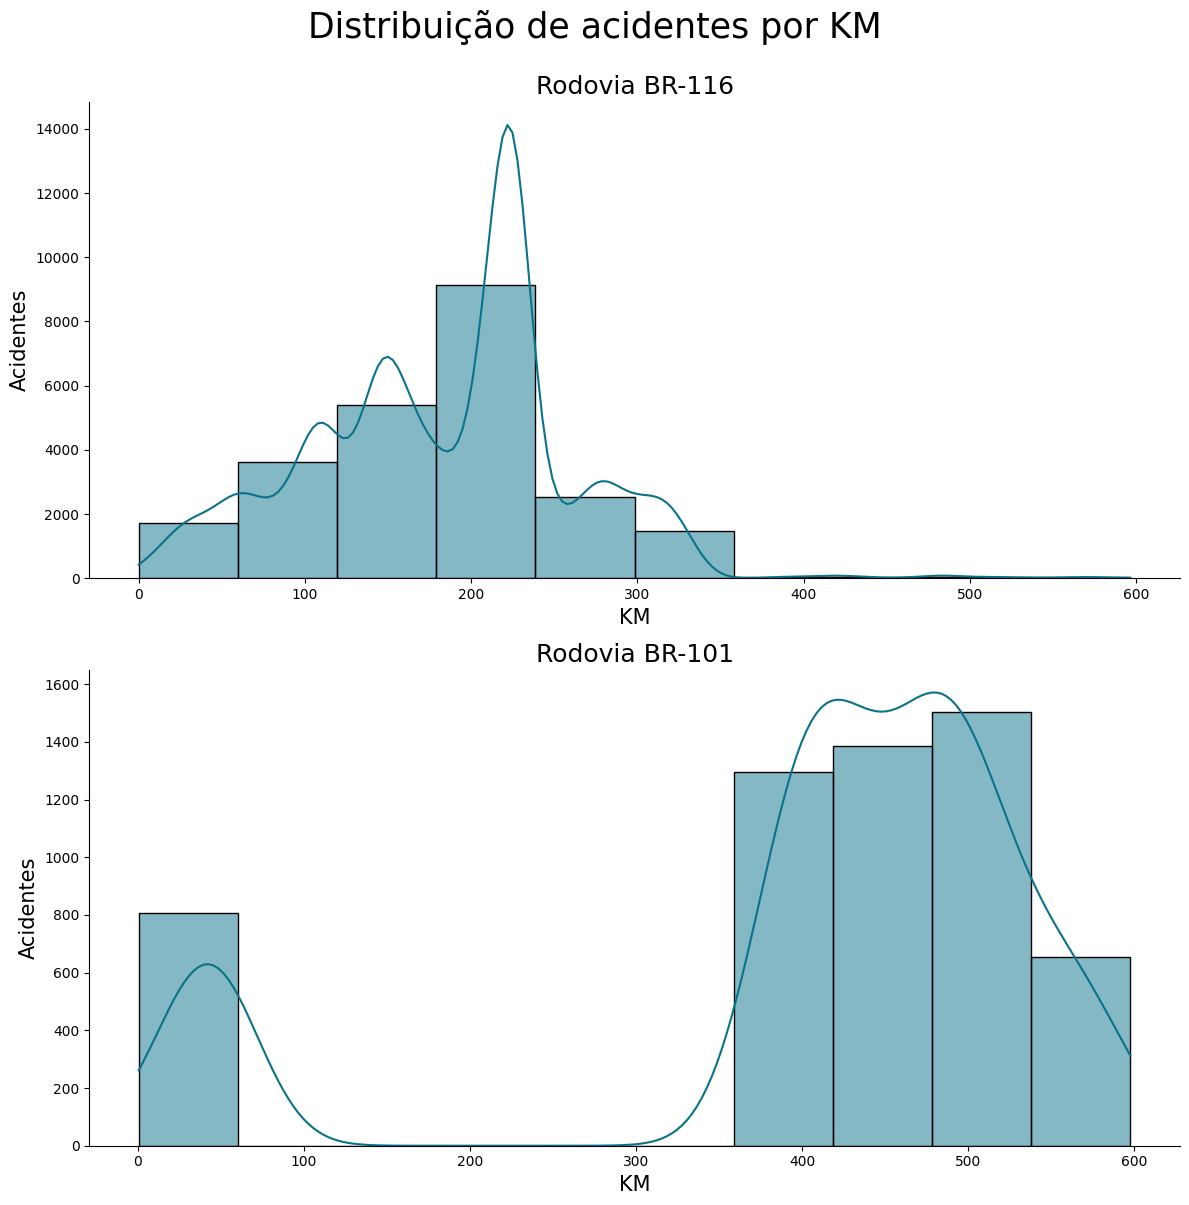

In [ ]:
# Criando o histograma de cada rodovia

# Cria a figura e os gráficos a serem plotados. Define o tamanho
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Cria o histograma por KM da BR-116
ax_br116 = sns.histplot(
    data = df[df['rodovia'] == 'BR-116'],
    x = 'km_ajustado',
    bins = 10,
    ax = axes[0],
    color = '#09738a',
    kde = True
)
# Cria o histograma por KM da BR-101
ax_br101 = sns.histplot(
    data = df[df['rodovia'] == 'BR-101'],
    x = 'km_ajustado',
    bins = 10,
    ax = axes[1],
    color = '#09738a',
    kde = True
)

# Alterando o título
ax_br116.set_title(
    'Rodovia BR-116',
    loc = 'center',
    fontsize = 18
)
ax_br101.set_title(
    'Rodovia BR-101',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax_br116.set_xlabel(
    'KM',
    fontsize = 15
)
ax_br116.set_ylabel(
    'Acidentes',
    fontsize = 15
)
ax_br101.set_xlabel(
    'KM',
    fontsize = 15
)
ax_br101.set_ylabel(
    'Acidentes',
    fontsize = 15
)

# Retira as linhas que fecham a 'caixa' do gráfico, mantendo apenas os eixos
sns.despine()

# Cria um título para a figura como um todo
plt.suptitle(
    'Distribuição de acidentes por KM', 
    fontsize=25,
    y=1     #Adiciona espaço em relação aos gráficos
)

# Organiza os elementos dos gráficos
plt.tight_layout()

# Exibe a figura
plt.show()

Com os dois histogramas podemos ver a distribuição de acidentes por KMs. Na rodovia BR-116, é possível verificar que a um pico de acidentes próximo ao KM 200. Enquanto na BR-101, podemos notar que os acidentes são mais distribuidos.